In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import f_oneway

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Import a 311 NYC service request.

In [3]:
hr1=pd.read_csv("/content/drive/MyDrive/simplilearn/python with data science /project1/311_Service_Requests_from_2010_to_Present.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
hr1.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
hr1.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [6]:
hr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [7]:
hr1.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

*first we see what % of missing data in dataset

and ploting a values in bar chart

In [8]:
hr1.isnull().sum()/len(hr1)*100

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.719659
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.966757
Location Type                       0.043565
Incident Zip                        0.869643
Incident Address                   14.768971
Street Name                        14.768971
Cross Street 1                     16.388203
Cross Street 2                     16.554483
Intersection Street 1              85.414602
Intersection Street 2              85.579552
Address Type                        0.936155
City                                0.869311
Landmark                           99.883937
Facility Type                       0.721987
Status                              0.000000
Due Date                            0.000998
Resolution Description              0.000000
Resolution

to visualize number of null values in dataset 
by ploting bar chart we can see 
which column has what num of null values 

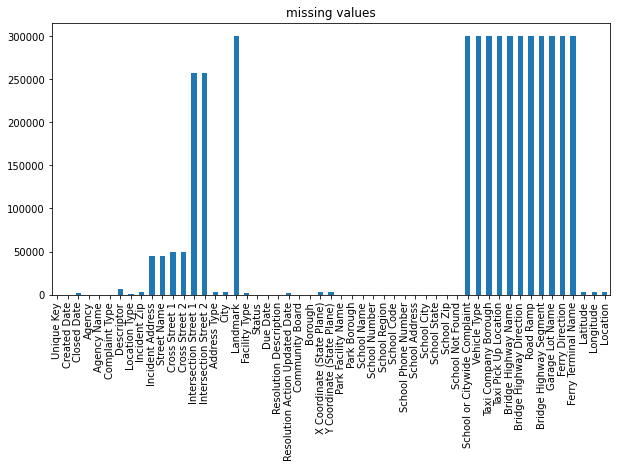

In [9]:
hr1.isnull().sum().plot(kind='bar', figsize=(10,5),title = 'missing values')

as visible in bar graph many columns has max missing values that contant null 

second task is to remove not columns  having maximum null values.

In [10]:
hr1.keys()

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [11]:
un_useble= ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type']

serching a values in status column and visualize what num of tipe values related to which cattegiry by bar chart 


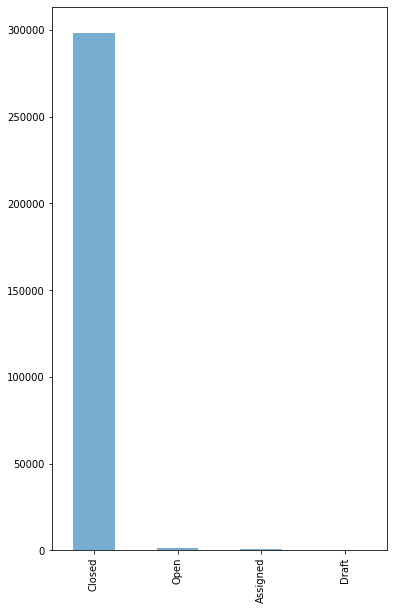

In [12]:
hr1['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(6,10))
plt.show()

In [13]:
hr1.drop(un_useble, inplace=True, axis=1)
hr1= hr1[(hr1['Latitude'].notnull())& (hr1['Longitude'].notnull()) & (hr1['Descriptor'].notnull())]
hr1 = hr1[hr1['Status']=='Closed']
hr1.drop(['Status'],inplace=True, axis=1)
hr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291204 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              291204 non-null  int64  
 1   Created Date            291204 non-null  object 
 2   Closed Date             291204 non-null  object 
 3   Agency                  291204 non-null  object 
 4   Complaint Type          291204 non-null  object 
 5   Descriptor              291204 non-null  object 
 6   Location Type           291149 non-null  object 
 7   Incident Zip            291164 non-null  float64
 8   City                    291164 non-null  object 
 9   Resolution Description  291204 non-null  object 
 10  Borough                 291204 non-null  object 
 11  Latitude                291204 non-null  float64
 12  Longitude               291204 non-null  float64
 13  Location                291204 non-null  object 
dtypes: float64(3), int64

second task 
changing data type from object to date and time by using date and time module 


In [14]:

hr1["Created Date"]=pd.to_datetime(hr1['Created Date'])
hr1["Closed Date"]=pd.to_datetime(hr1['Closed Date'])


In [15]:
hr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291204 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unique Key              291204 non-null  int64         
 1   Created Date            291204 non-null  datetime64[ns]
 2   Closed Date             291204 non-null  datetime64[ns]
 3   Agency                  291204 non-null  object        
 4   Complaint Type          291204 non-null  object        
 5   Descriptor              291204 non-null  object        
 6   Location Type           291149 non-null  object        
 7   Incident Zip            291164 non-null  float64       
 8   City                    291164 non-null  object        
 9   Resolution Description  291204 non-null  object        
 10  Borough                 291204 non-null  object        
 11  Latitude                291204 non-null  float64       
 12  Longitude               291204

 add new calumn "Request_closing_time" for colepsed time between created date anf closed date 


In [16]:
hr1['Request_closing_time']=hr1["Closed Date"]-hr1["Created Date"]

In [17]:
hr1['Request_closing_time']

0        0 days 00:55:15
1        0 days 01:26:16
2        0 days 04:51:31
3        0 days 07:45:14
4        0 days 03:27:02
               ...      
300692   0 days 00:38:29
300694   0 days 02:00:31
300695   0 days 03:07:17
300696   0 days 04:05:33
300697   0 days 04:08:49
Name: Request_closing_time, Length: 291204, dtype: timedelta64[ns]

In [18]:
hr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291204 entries, 0 to 300697
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              291204 non-null  int64          
 1   Created Date            291204 non-null  datetime64[ns] 
 2   Closed Date             291204 non-null  datetime64[ns] 
 3   Agency                  291204 non-null  object         
 4   Complaint Type          291204 non-null  object         
 5   Descriptor              291204 non-null  object         
 6   Location Type           291149 non-null  object         
 7   Incident Zip            291164 non-null  float64        
 8   City                    291164 non-null  object         
 9   Resolution Description  291204 non-null  object         
 10  Borough                 291204 non-null  object         
 11  Latitude                291204 non-null  float64        
 12  Longitude       

In [19]:
hr1.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Location', 'Request_closing_time'],
      dtype='object')

then again see the % of null values remain in data set 

In [20]:
hr1.isnull().sum()/len(hr1)*100

Unique Key                0.000000
Created Date              0.000000
Closed Date               0.000000
Agency                    0.000000
Complaint Type            0.000000
Descriptor                0.000000
Location Type             0.018887
Incident Zip              0.013736
City                      0.013736
Resolution Description    0.000000
Borough                   0.000000
Latitude                  0.000000
Longitude                 0.000000
Location                  0.000000
Request_closing_time      0.000000
dtype: float64

complain distribution across borough 

visualizing in pie chart

In [21]:
hr1['Borough'].value_counts()

BROOKLYN         96881
QUEENS           79811
MANHATTAN        62074
BRONX            40224
STATEN ISLAND    12214
Name: Borough, dtype: int64

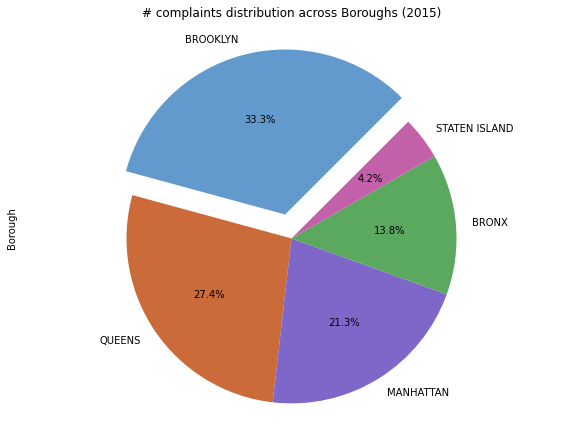

In [22]:
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
hr1['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        explode = (0.15, 0, 0, 0,0), startangle=45, shadow=False, colors = colors,
                        figsize = (8,6))
#plt.legend(title='BOROUGH', loc='upper right', bbox_to_anchor=(1.5,1))
plt.axis('equal')
plt.title('# complaints distribution across Boroughs (2015)\n')
plt.tight_layout()
plt.show()

In [23]:
hr1['Request_closing_time'].sort_values()

61125     0 days 00:01:00
60357     0 days 00:02:00
222119    0 days 00:02:00
163683    0 days 00:02:00
260083    0 days 00:02:00
               ...       
12167     9 days 07:21:06
12168     9 days 07:22:12
21268    21 days 15:16:01
23664    24 days 01:21:36
244488   24 days 16:52:22
Name: Request_closing_time, Length: 291204, dtype: timedelta64[ns]

to calculating avarage time  we have to cal aprox time for each values of time 

and view values of request closing time  in hour (aprox)

In [24]:
hr1['Request_Closing_Hours'] = hr1['Request_closing_time'].astype('timedelta64[h]')+1
hr1[['Request_closing_time','Request_Closing_Hours']].head()

,Request_closing_time,Request_Closing_Hours
0,0 days 00:55:15,1.0
1,0 days 01:26:16,2.0
2,0 days 04:51:31,5.0
3,0 days 07:45:14,8.0
4,0 days 03:27:02,4.0


#grouping complaint type and borough based on Request Closing Hour



#and taking a visualized look of the data--based on perticular location what type and number of compl. accur at

In [25]:

grouped_data = hr1.groupby(['Complaint Type','Borough'])[['Request_Closing_Hours']].mean().unstack()

In [26]:
grouped_data.head()

Request_Closing_Hours            ...                        
Borough                          BRONX  BROOKLYN  ...    QUEENS STATEN ISLAND
Complaint Type                                    ...                        
Animal Abuse                  7.837226  5.339331  ...  5.919957      5.464991
Blocked Driveway              6.761950  4.914569  ...  5.037781      4.581037
Derelict Vehicle              9.708568  6.467970  ...  9.007899      5.539989
Disorderly Youth              4.746032  4.638889  ...  3.796610      4.434783
Drinking                      6.329787  4.038911  ...  4.394958      3.971429

[5 rows x 5 columns]

#visualizing top 5 complaints in each borough using subplots

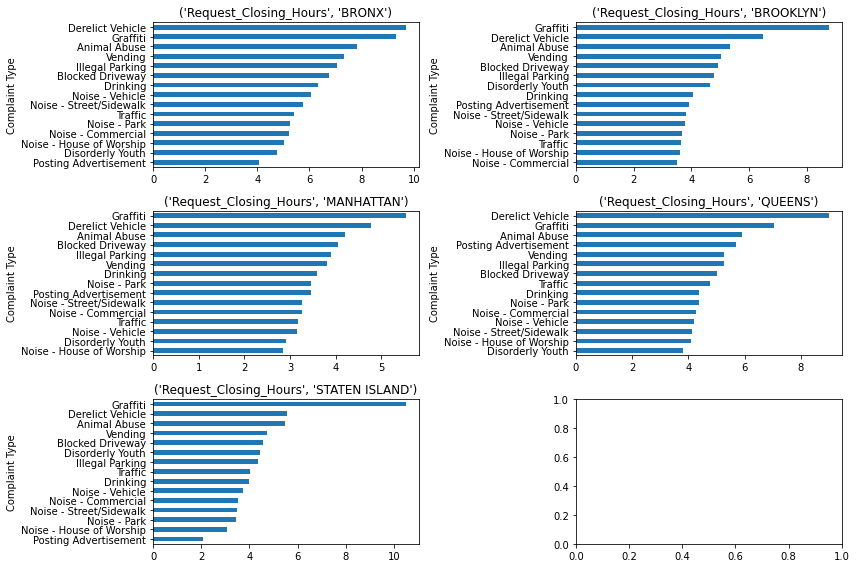

In [27]:
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,8))

for i, (label,col) in enumerate(grouped_data.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

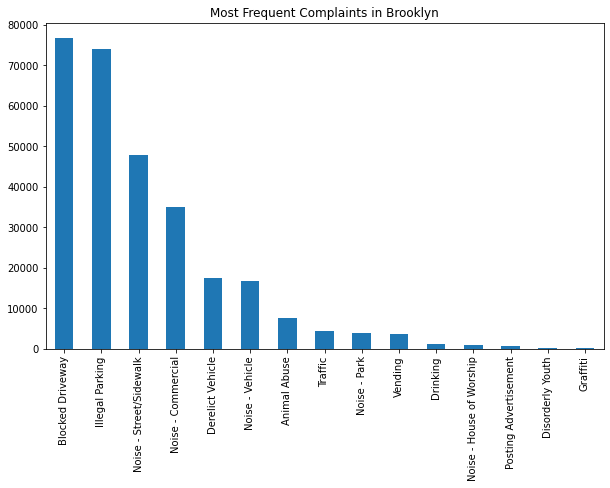

In [28]:
(hr1['Complaint Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn')

#doing ANOVA test to check whether the average response time across complaint types is similar or not

**h0**= average response time across complaint types is similar
if p>0.05

ha=average response time across complaint types is not  similar 
so for proove that we have cheake p value p<0.05

In [29]:
data = {}
for complaint in hr1['Complaint Type'].unique():
    data[complaint] = np.log(hr1[hr1['Complaint Type']==complaint]['Request_Closing_Hours'])

In [30]:
data[complaint].head()

4670     0.000000
9034     0.693147
12027    0.000000
12176    1.791759
17181    0.693147
Name: Request_Closing_Hours, dtype: float64

In [31]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

In [32]:
# import f_oneway from scipy.stats library

stat, p = f_oneway(data['Noise - Street/Sidewalk'],data['Blocked Driveway'],data['Illegal Parking'],data['Derelict Vehicle'],
                   data['Noise - Commercial'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('the average response time across complaint types is similar hence "fail to reject H0"')
else:
    print('the average response time across complaint types is not similar hence "reject H0"')

Statistics=2393.511, p=0.000
the average response time across complaint types is not similar hence "reject H0"


checking correlation between location and complaint types

to performe corelation test we have all the value in numerical formate so first task is to change cattegorical values to numerical 
by using getdummies ()

then perform a test between location and comp. type 

In [33]:
corr_test_data = hr1[['Complaint Type','Borough','Longitude','Latitude','City']]

In [34]:
corr_test_data['Complaint Type']=pd.get_dummies(corr_test_data['Complaint Type'])
corr_test_data['Borough']=pd.get_dummies(corr_test_data['Borough'])
corr_test_data['City']=pd.get_dummies(corr_test_data['City'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [35]:
corr_test_data.corr()

,Complaint Type,Borough,Longitude,Latitude,City
Complaint Type,1.000000,0.021228,-0.000783,-0.004795,0.025445
Borough,0.021228,1.000000,0.230429,0.603444,-0.010857
Longitude,-0.000783,0.230429,1.000000,0.368839,0.044940
Latitude,-0.004795,0.603444,0.368839,1.000000,-0.044042
City,0.025445,-0.010857,0.044940,-0.044042,1.000000


view the correlation by using heatmap 
using seaborn lib 

In [36]:
import seaborn as sns


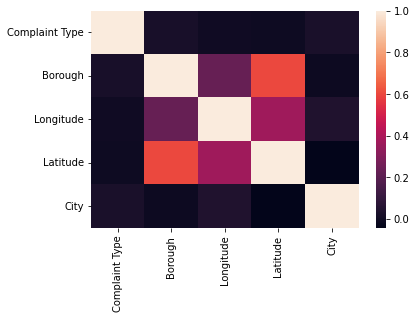

In [37]:
ax = sns.heatmap(corr_test_data.corr())